# Data Exploration & Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Import the dataset
file_location = "winemag-data_first150k.csv"
data = pd.read_csv(file_location)
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
# Remove unnecessary columns
cols = ['country','points','price','variety']
modified_data = data[cols]
modified_data

,country,points,price,variety
0,US,96,235.0,Cabernet Sauvignon
1,Spain,96,110.0,Tinta de Toro
2,US,96,90.0,Sauvignon Blanc
3,US,96,65.0,Pinot Noir
4,France,95,66.0,Provence red blend
...,...,...,...,...
150925,Italy,91,20.0,White Blend
150926,France,91,27.0,Champagne Blend
150927,Italy,91,20.0,White Blend
150928,France,90,52.0,Champagne Blend


## Statistics for Numberical Variables

In [6]:
#numerical column description

modified_data[['points','price']].describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


From the above statistics, it can be seen that 'points' column doesn't have any missing values, the distribution of points are relatively more even than the 'price' column. The 'price' column contains around 13000 missing values. There are also some extreme values in the 'price' column. I will look in more details with box plot in the following section.

## Box plot for Numeric Variables

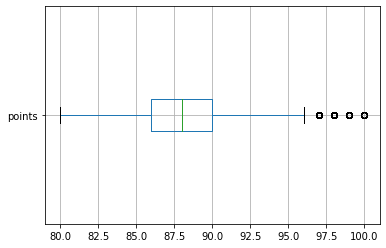

In [9]:
# box plot for numberic values

modified_data[['points']].plot.box(vert = False, grid = True)

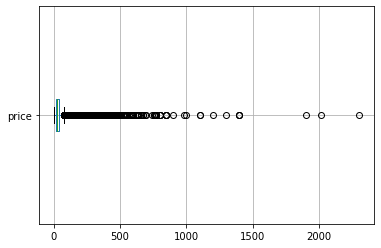

In [10]:
modified_data[['price']].plot.box(vert = False, grid = True)

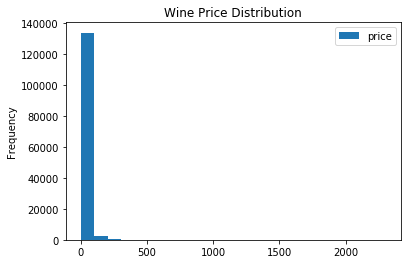

In [75]:
modified_data[['price']].plot.hist(bins = 23, title = 'Wine Price Distribution')

From the above 2 box plots, it can be seen that Price column contain many large outliers, while Points column only has ver few outliers. The majority of wines have prices less than 100.

## Bar Charts for Categorical Variables 

In [27]:
# Prepare df for bar chart for column 'country'
df_country_bar = modified_data[['country','points']].groupby('country').count()
df_country_bar.sort_values(by = ['points'], ascending = False, inplace = True)
df_country_bar.reset_index(inplace = True)
#df_country_bar

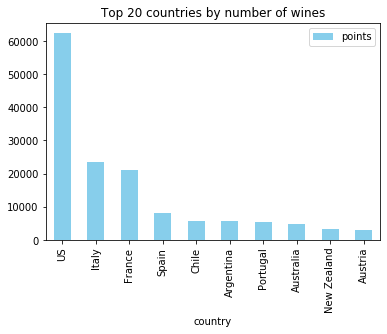

In [35]:
df_country_bar.iloc[:10].plot.bar(x = 'country', y = 'points',
                       color = 'skyblue',
                       title = 'Top 10 countries by number of wines')

In [38]:
df_country_bar.iloc[:10][['points']].sum()

points    143344
dtype: int64

In [60]:
top_10_country = df_country_bar.iloc[:10][['country']].to_numpy().tolist()
top_10_country_list = []
for i in top_10_country:
    for j in i:
        top_10_country_list.append(j)
top_10_country_list    

['US',
 'Italy',
 'France',
 'Spain',
 'Chile',
 'Argentina',
 'Portugal',
 'Australia',
 'New Zealand',
 'Austria']

From the above bar plot, it can be clearly seen that the majority of wines in the dataset are from US. The top 3 countries, US, Italy and France constitued more than 80% of the datasets. It is possible that country might not be a good indicator of the wine ratings due to the imbalance data.

In [28]:
# Prepare df for bar chart for column 'variety'
df_variety_bar = modified_data[['variety','points']].groupby('variety').count()
df_variety_bar.sort_values(by = ['points'], ascending = False, inplace = True)
df_variety_bar.reset_index(inplace = True)
df_variety_bar

,variety,points
0,Chardonnay,14482
1,Pinot Noir,14291
2,Cabernet Sauvignon,12800
3,Red Blend,10062
4,Bordeaux-style Red Blend,7347
...,...,...
627,Terret Blanc,1
628,Espadeiro,1
629,Sangiovese Cabernet,1
630,Tempranillo-Malbec,1


There are 631 different kinds of varities, but the majority variety only has 1 wine in the dataset.

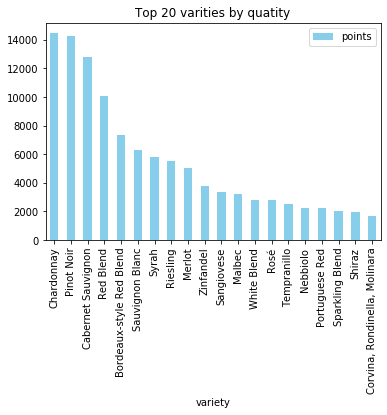

In [36]:
df_variety_bar.iloc[:20].plot.bar(x = 'variety', y = 'points',
                       color = 'skyblue',
                       title = 'Top 20 varities by quatity')

In [34]:
df_variety_bar.iloc[:20][['points']].sum()

points    110383
dtype: int64

In [62]:
top_20_varieties = df_variety_bar.iloc[:20][['variety']].to_numpy().tolist()
top_20_varieties_list = []
for i in top_20_varieties:
    for j in i:
        top_20_varieties_list.append(j)
top_20_varieties_list    

['Chardonnay',
 'Pinot Noir',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Sauvignon Blanc',
 'Syrah',
 'Riesling',
 'Merlot',
 'Zinfandel',
 'Sangiovese',
 'Malbec',
 'White Blend',
 'Rosé',
 'Tempranillo',
 'Nebbiolo',
 'Portuguese Red',
 'Sparkling Blend',
 'Shiraz',
 'Corvina, Rondinella, Molinara']

Top 20 varieties constitute more than 80% of the population.

### If we only keep top 10 countries and top 20 varieties in the dataset, how many data will be left?

In [67]:
final_data = modified_data[modified_data['country'].isin(top_10_country_list)]
final_data


,country,points,price,variety
0,US,96,235.0,Cabernet Sauvignon
1,Spain,96,110.0,Tinta de Toro
2,US,96,90.0,Sauvignon Blanc
3,US,96,65.0,Pinot Noir
4,France,95,66.0,Provence red blend
...,...,...,...,...
150925,Italy,91,20.0,White Blend
150926,France,91,27.0,Champagne Blend
150927,Italy,91,20.0,White Blend
150928,France,90,52.0,Champagne Blend


In [69]:
final_data = final_data[final_data['variety'].isin(top_20_varieties_list)]
final_data

,country,points,price,variety
0,US,96,235.0,Cabernet Sauvignon
2,US,96,90.0,Sauvignon Blanc
3,US,96,65.0,Pinot Noir
8,US,95,65.0,Pinot Noir
9,US,95,60.0,Pinot Noir
...,...,...,...,...
150911,France,87,37.0,Pinot Noir
150912,France,87,65.0,Pinot Noir
150915,US,93,30.0,White Blend
150925,Italy,91,20.0,White Blend


### 104748 rows left in the dataset, further removing the wines with prices greater than 100

In [80]:
final_data = final_data[final_data['price'] <= 100]
final_data

,country,points,price,variety
2,US,96,90.0,Sauvignon Blanc
3,US,96,65.0,Pinot Noir
8,US,95,65.0,Pinot Noir
9,US,95,60.0,Pinot Noir
11,US,95,48.0,Pinot Noir
...,...,...,...,...
150911,France,87,37.0,Pinot Noir
150912,France,87,65.0,Pinot Noir
150915,US,93,30.0,White Blend
150925,Italy,91,20.0,White Blend


After removing the wines with prices greater than 100, the final dataset that will be used to train models has 93472 rows.

## Check the Distribution after Preprocessing

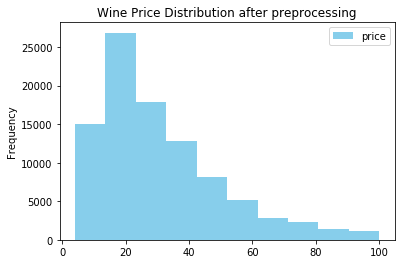

In [89]:
# Wine price distribution
final_data[['price']].plot.hist(bins = 10, 
                                color = 'skyblue',
                                title = 'Wine Price Distribution after preprocessing')

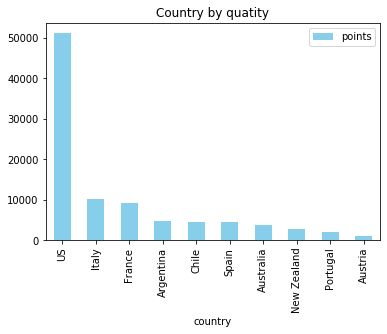

In [85]:
# Country Bar plot
df_country_bar_2 = final_data[['country','points']].groupby('country').count()
df_country_bar_2.sort_values(by = ['points'], ascending = False, inplace = True)
df_country_bar_2.reset_index(inplace = True)
df_country_bar_2.plot.bar(x = 'country', y = 'points',
                       color = 'skyblue',
                       title = 'Country by quatity')

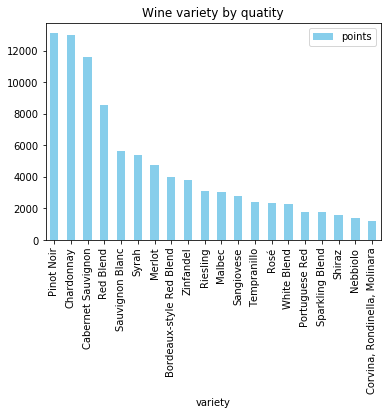

In [86]:
# Variety Bar plot
df_variety_bar_2 = final_data[['variety','points']].groupby('variety').count()
df_variety_bar_2.sort_values(by = ['points'], ascending = False, inplace = True)
df_variety_bar_2.reset_index(inplace = True)
df_variety_bar_2.plot.bar(x = 'variety', y = 'points',
                       color = 'skyblue',
                       title = 'Wine variety by quatity')

In [91]:
# Save the final data frame as csv file
final_data.reset_index(inplace = True)
final_data.to_csv('finaldata.csv')